# A7: Data analysis in Python

In [1]:
# Run once then delete this cell
!pip install statsmodels
!pip install seaborn

In [29]:
import numpy as np
import pandas as pd
import plotly.express as px
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from io import StringIO

## Data representations

### Pandas DataFrames

Consider an Excel or csv file with columns of data containing volumes and pressures:

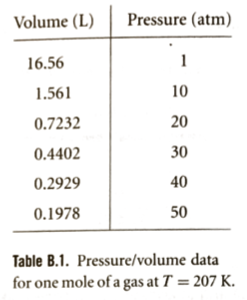

We can bring this data into Python by making a pandas DataFrame; in general, the easiest way to do this is to import the `.csv` or `.xlsx` file. In this case, we'll just put the `.csv` data into a string in Python:

In [148]:
PV_csv=StringIO("""
V_L,P_atm
16.56,1
1.561,10
0.7232,20
0.4402,30
0.2929,40
0.1978,50
""")
df = pd.read_csv(PV_csv)


**Plot the data (Pressure vs Volume) using plotly (`px.scatter` or matplotlib (`plt.plot` or `plt.scatter`)**

Define columns containing the moles, temperature, and compressibility factor $Z = PV/(nRT)$:

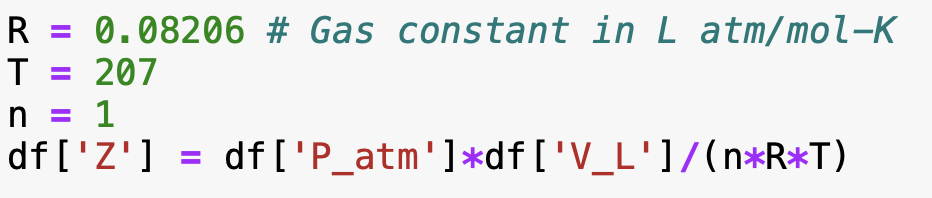

If you display the data frame again, you should see this:


<div>
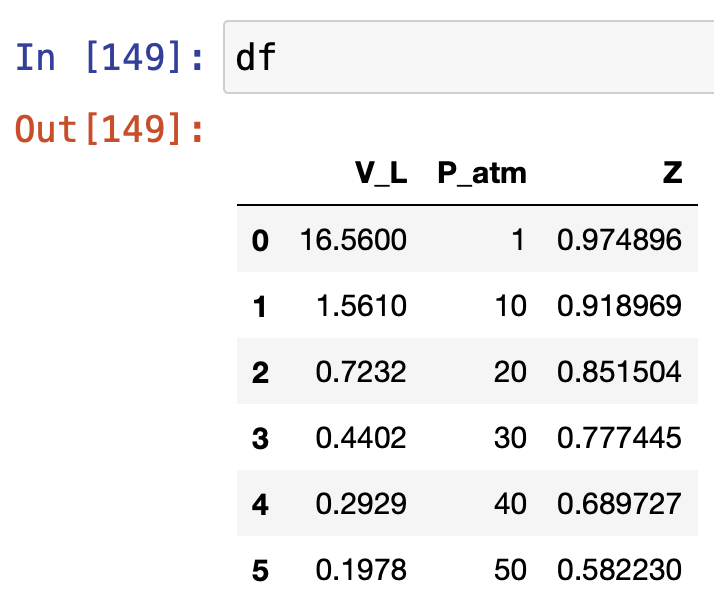
    </div>

We can plot the compressibility factor versus temperature to view the deviations from ideality:
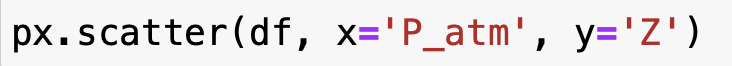

**Explain the plot - where does the gas behave most ideally? Are these deviations from ideality significant?** (add your answer in markdown)

## Non-linear curve fitting

The van der Waals equation of state should predict the properties of the gas well even in this case; let's fit the data to the van der Waals equation
$$ P = \frac{RT}{\bar{V} - b} - \frac{a}{\bar{V}^2}$$

where the paramater $b$ represents the size of the gas particles (larger $b$ causes more positive deviations from ideality), and the parameter $a$ represents the strength of the intermolecular forces (larger $a$ = stronger IMFS = larger negative deviations from ideality).

Define the van der Waals equation in Python:

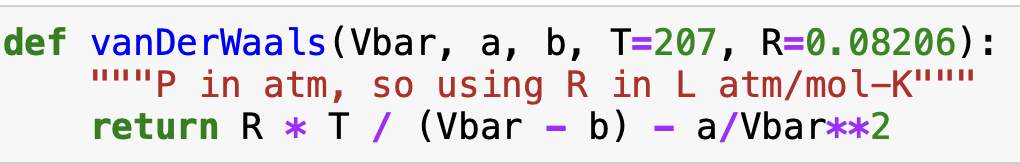

In [114]:
def vanDerWaals(Vbar, a, b, T=207, R=0.08206):
    """P in atm, so using R in L atm/mol-K"""
    return R * T / (Vbar - b) - a/Vbar**2

In [115]:
from scipy.optimize import curve_fit
popt, pcov = curve_fit(vanDerWaals, df['V_L'], df['P_atm'], 
                       p0=[1, 0.01])
# p0 is our initial guess for a and b
# computers are not smart - they won't find
# the correct values of the parameters unless
# we give it a good initial guess...
                       

In [166]:
popt

array([2.74421   , 0.05644415])

In [170]:
V = np.linspace(0.197,17)
P_vanDerWaals = vanDerWaals(V, *popt)

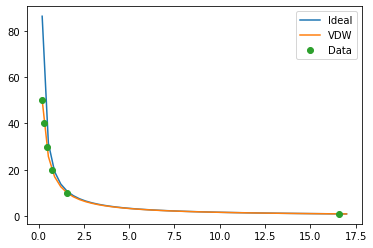

In [168]:
plt.plot(V, P_ideal, '-', label='Ideal')
plt.plot(V, P_vanDerWaals, '-', label='VDW')
plt.plot(df['V_L'], df['P_atm'], 'o', label='Data')
plt.legend()

Then we can use `pd.read_csv` to load the data. Do that below. It should look like:

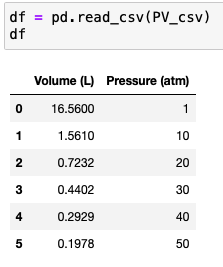

Make a scatter plot with plotly using `px.scatter(df, x='V (L)', y='P (atm)')`

Let's make this easier to compare to the ideal gas law by plotting something that should be a straight line: We'll plot $P$ vs $1/V$ instead by defining a column for $1/V$ - we can do that using the bracket syntax - you can tab-complete to autocomplete the column name: `'V (L)'`

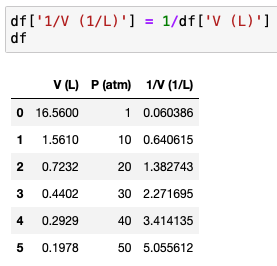

Now we can update our plot and add a trendline:

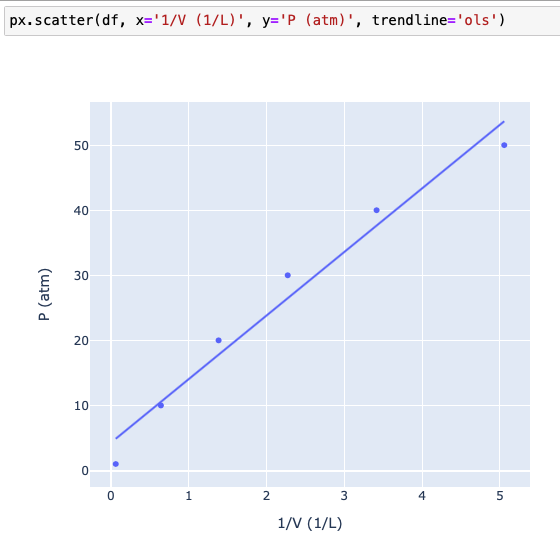

You can scan over your plot to get the trendline.

### Importing from data files

Download a CSV file containing the temperature-dependent heat capacity of ammonia gas from http://hdl.handle.net/10066/17736 and save the Ammonia HeatCapacity.csv file to your Downloads folder. Load the file into Python using

```
df2 = pd.read_csv(""https://scholarship.tricolib.brynmawr.edu/bitstream/handle/10066/17736/AmmoniaHeatCapacity.csv?sequence=1&isAllowed=y")
df2
```

In [6]:
df2 = pd.read_csv("https://scholarship.tricolib.brynmawr.edu/bitstream/handle/10066/17736/AmmoniaHeatCapacity.csv?sequence=1&isAllowed=y")

**Try it:** Use the same procedure from above to plot the data and add a trendline:

For the next part, it's useful to have a version of the fit parameters than you can copy. Do that by saving your plotly figure to a variable then loading the parameters:

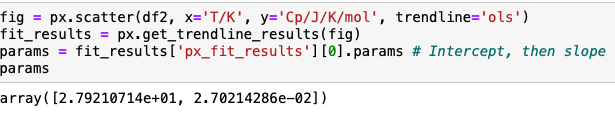

### Integrating the heat capacity to determine $\Delta H$

For this part (see last problem on assignment), you can use sympy again (you could also do this integral by hand (there's only two terms!).

In [3]:
import sympy as sm
sm.init_printing()

T = sm.symbols('T', positive=True) # Define the symbol for temperature, our independent variable

sm.integrate(27.92+0.02702*T,(T, 300, 500))